<a href="https://colab.research.google.com/github/rosacarla/treinamento-rede-neural-RNT/blob/main/Treinamento_rede_neural_RNT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # TREINAMENTO DE REDE NEURAL TEMPORAL - RNT  
> CURSO: TECNOLOGIA EM INTELIGÊNCIA ARTIFICIAL APLICADA  
> DISCIPLINA: REDES NEURAIS  
> PROFESSOR: EDSON RUSCHEL (autor do código original S6_RNT.py)  
> ESTUDANTE: Carla Edila Silveira  
> OBJETIVO: prever cotação de ações a partir de uma base de dados que fornece valores de ações (em dólar) em determinado período de tempo.  
> DATA: 18/09/2023


> ## CONCEITO DE REDE NEURAL TEMPORAL
> <img align='left' src='https://i.postimg.cc/6604P3pZ/RNT-S6.png' height=280>
> <p align='justify'>A <b>Rede Neural Temporal (RTN)</b> é uma arquitetura (ver exemplo na imagem ao lado) com capacidade de processar e analisar dados sequenciais ao longo do tempo. Ao contrário das redes neurais tradicionais, que tratam cada entrada de dados de forma isolada, a RNT tem conexões recorrentes que permitem que informações anteriores sejam armazenadas e usadas para tomar decisões em momentos futuros.</p>
> <p align='justify'><b>A LSTM (<i>Long Short Term Memory</i>) tem a capacidade de "lembrar” de valores em intervalos arbitrários.</b> Aplicável para tarefas de classificação, processamento e previsão de séries temporais com períodos de tempo de  duração desconhecida. É utilizada em vários contextos de PLN.</p>

In [ ]:
# IMPORTAÇÃO DE BIBLIOTECAS

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
# MONTAGEM DO DRIVE PARA CARREGAR DADOS

#from google.colab import drive
#drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# CONFIGURAÇÃO DO ENDEREÇO DOS ARQUIVOS

# INSERIR CAMINHOS DOS ARQUIVOS DE TREINAMENTO E TESTE
# 'C:\RN\serie_treinamento.csv' e 'C:\RN\serie_teste.csv'

arquivo_treinamento = '/content/gdrive/MyDrive/RN/serie_treinamento_S6.csv'
arquivo_teste = '/content/gdrive/MyDrive/RN/serie_teste_S6.csv'

In [ ]:
# DEFINE JANELA DE PREVISÃO PARA REDE NEURAL TEMPORAL

janela_prev = 5

In [ ]:
# DEFINE FUNÇÃO DE PERDA (FUNÇÃO CUSTO) E OTIMIZADOR

# mean_squared_error
# mean_absolute_error
# categorical_crossentropy
# binary_crossentropy

funcao_perda = 'mean_absolute_error'
# Opcoes de otimizadores
# sgd
# adam
# RMSprop

otimizador = 'adam'

In [ ]:
# DEFINE NÚMERO DE NEURÔNIOS DA CAMADA LSTM E DA CAMADA DENSA

# Quantidade de neurônios da Camada LSTM
neuronios_LSTM = 64

# Quantidade de neurônios da Camada Densa
neuronios_densa = 128

In [ ]:
# DEFINE NÚMERO DE ÉPOCAS E TAMANHO DO LOTE DE TREINAMENTO PARA CADA ÉPOCA

epocas = 20

lote = 200

In [ ]:
# CARREGAMENTO E PREPROCESSAMENTO DOS DADOS

# Ler arquivos CSV de treinamento e teste
train_df = pd.read_csv(arquivo_treinamento)
test_df = pd.read_csv(arquivo_teste)

# Filtrar apenas coluna 'Valor' nos dados de treinamento e teste
train_data = train_df[['Valor']].values
test_data = test_df[['Valor']].values

# Normalizar dados de treinamento entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [ ]:
# PRÉ-PROCESSAMENTO DO CONJUNTO DE DADOS DE ACORDO COM A JANELA DE TEMPO

# Função auxiliar para criar conjuntos de dados com base na janela de tempo
def create_dataset(dataset, window_size=1):
    X, Y = [], []
    for i in range(len(dataset) - window_size):
        window = dataset[i:(i + window_size), 0]
        X.append(window)
        Y.append(dataset[i + window_size, 0])
    return np.array(X), np.array(Y)

# Criars conjuntos de treinamento e teste
X_train, y_train = create_dataset(train_data_scaled, janela_prev)
X_test, y_test = create_dataset(test_data_scaled, janela_prev)

# Reshape dos dados para formato esperado pela LSTM [amostras, janela de tempo, características]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))

In [ ]:
# CRIAÇÃO DO MODELO DA REDE NEURAL TEMPORAL

# Cria modelo da rede neural
model = Sequential()
model.add(LSTM(neuronios_LSTM, input_shape=(janela_prev, 1)))
model.add(Dense(neuronios_densa))
model.compile(loss=funcao_perda, optimizer=otimizador)

# Cria modelo da rede neural
# model = Sequential()
# mmodel.add(LSTM(neuronios_LSTM, input_shape=(janela_prev, 1), return_sequences=True))
# model.add(LSTM(neuronios_LSTM, return_sequences=False))
# model.add(Dense(neuronios_densa))
# model.compile(loss=funcao_perda, optimizer=otimizador)

In [ ]:
# TREINAMENTO DA REDE NEURAL TEMPORAL

# Treinar o modelo
model.fit(X_train, y_train, epochs=epocas, batch_size=lote, verbose=1)

Epoch 1/20
7/7 [==============================] - 2s 9ms/step - loss: 0.2971
Epoch 2/20
7/7 [==============================] - 0s 9ms/step - loss: 0.2712
Epoch 3/20
7/7 [==============================] - 0s 8ms/step - loss: 0.2303
Epoch 4/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1641
Epoch 5/20
7/7 [==============================] - 0s 9ms/step - loss: 0.1138
Epoch 6/20
7/7 [==============================] - 0s 10ms/step - loss: 0.0863
Epoch 7/20
7/7 [==============================] - 0s 7ms/step - loss: 0.0631
Epoch 8/20
7/7 [==============================] - 0s 8ms/step - loss: 0.0436
Epoch 9/20
7/7 [==============================] - 0s 7ms/step - loss: 0.0314
Epoch 10/20
7/7 [==============================] - 0s 8ms/step - loss: 0.0308
Epoch 11/20
7/7 [==============================] - 0s 8ms/step - loss: 0.0290
Epoch 12/20
7/7 [==============================] - 0s 12ms/step - loss: 0.0258
Epoch 13/20
7/7 [==============================] - 0s 14ms/step - loss:

In [ ]:
# REALIZAR PREVISÕES DO MODELO

# Fazer previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

18/18 [==============================] - 0s 2ms/step


In [ ]:
# PÓS-PROCESSAMENTO DOS DADOS

# Desfazer normalização dos dados
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

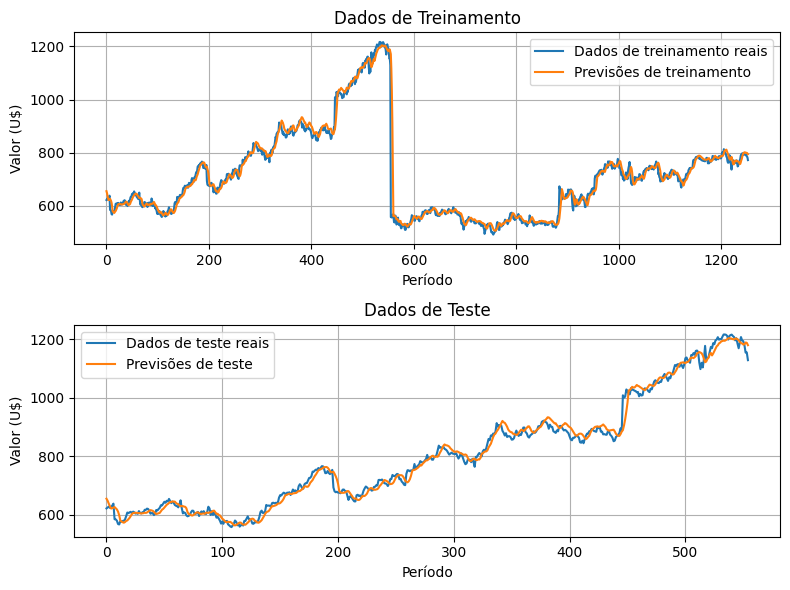

In [ ]:
# APRESENTAÇÃO GRÁFICA DOS RESULTADOS

# Plota resultados em dois gráficos separados
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Gráfico 1: Dados de treinamento
ax1.plot(y_train[0], label='Dados de treinamento reais')
ax1.plot(train_predict[:, 0], label='Previsões de treinamento')
ax1.legend()
ax1.set_title('Dados de Treinamento')
ax1.set_xlabel('Período')
ax1.set_ylabel('Valor (U$)')
ax1.grid(True)

# Gráfico 2: Dados de teste
ax2.plot(y_test[0], label='Dados de teste reais')
ax2.plot(test_predict[:, 0], label='Previsões de teste')
ax2.legend()
ax2.set_title('Dados de Teste')
ax2.set_xlabel('Período')
ax2.set_ylabel('Valor (U$)')
ax2.grid(True)

# Ajusta espaçamento entre subplots
plt.tight_layout()

# ExibE gráficos
plt.show()

In [ ]:
# APRESENTAÇÃO DAS MÉTRICAS DE DESEMPENHO

mse_train = mean_squared_error(y_train[0], train_predict[:, 0])
mse_test = mean_squared_error(y_test[0], test_predict[:, 0])

print('\n' + '=' * 70)
print("Erro Médio Quadrático (MSE) - Treinamento: {:.4f}".format(mse_train))
print("Erro Médio Quadrático (MSE) - Teste: {:.4f}".format(mse_test))
print('\n')

mae_train = mean_absolute_error(y_train[0], train_predict[:, 0])
mae_test = mean_absolute_error(y_test[0], test_predict[:, 0])

print('=' * 70)
print("Erro Médio Absoluto (MAE) - Treinamento: {:.4f}".format(mae_train))
print("Erro Médio Absoluto (MAE) - Teste: {:.4f}".format(mae_test))
print('\n')

r2_train = r2_score(y_train[0], train_predict[:, 0])
r2_test = r2_score(y_test[0], test_predict[:, 0])

print('=' * 70)
print("Coeficiente de Determinação (R²) - Treinamento: {:.4f}".format(r2_train))
print("Coeficiente de Determinação (R²) - Teste: {:.4f}".format(r2_test))
print('\n' + '=' * 70)


Erro Médio Quadrático (MSE) - Treinamento: 1160.0992
Erro Médio Quadrático (MSE) - Teste: 362.9155


Erro Médio Absoluto (MAE) - Treinamento: 14.5464
Erro Médio Absoluto (MAE) - Teste: 14.3127


Coeficiente de Determinação (R²) - Treinamento: 0.9574
Coeficiente de Determinação (R²) - Teste: 0.9894



> ## EXECUÇÕES DO MODELO COM AJUSTES DE PARÂMETROS  
> <p align="justify">Realizou-se treinamento de uma rede neural temporal do tipo LSTM com a alteração de valores dos parâmetros ajustáveis em diversas baterias para obter o melhor desempenho possível do modelo de RNT.</p>
> </br>
> - 1a. execução  
> Parâmetros: janela_prev = 200; funcao_perda = 'binary_crossentropy'; otimizador = 'RMSprop'; neuronios_LSTM = 4; neuronios_densa = 20; epocas = 10; lote = 200 </br>
> </br>
> <img src='https://i.postimg.cc/Pfv2bbwt/S6-exe1.png'></br>
> </br>
> - 2a. execução  
> Parâmetros: janela_prev = 1; funcao_perda = 'binary_crossentropy'; otimizador = 'RMSprop'; neuronios_LSTM = 4; neuronios_densa = 20; epocas = 10; lote = 200 </br>
> </br>
> <img src='https://i.postimg.cc/63qwbbNb/S6-exe2.png'></br>
> </br>
> - 3a. execução  
> Parâmetros: janela_prev = 5; funcao_perda = 'mean_squared_error'; otimizador = 'adam'; neuronios_LSTM = 64; neuronios_densa = 128; epocas = 5; lote = 150 </br>
> </br>
> <img src='https://i.postimg.cc/WzL793D9/S6-exe3.png'></br>  
> </br>
> - 4a. execução  
> Parâmetros: janela_prev = 5; funcao_perda = 'mean_squared_error'; otimizador = 'adam'; neuronios_LSTM = 64; neuronios_densa = 128; epocas = 10; lote = 200 </br>
> </br>
> <img src='https://i.postimg.cc/Njqw17fT/S6-exe4.png'></br>
> </br>
> - 5a. execução  
> Parâmetros: janela_prev = 5; funcao_perda = 'mean_absolute_error'; otimizador = 'adam'; neuronios_LSTM = 64; neuronios_densa = 128; epocas = 20; lote = 200 </br>
> </br>
> <img src='https://i.postimg.cc/QtkqyDph/S6-exe5.png'></br>
> </br>   
> - 6a. execução (com camada extra de neurônios)  
> Parâmetros: janela_prev = 1; funcao_perda = 'mean_absolute_error'; otimizador = 'adam'; neuronios_LSTM = 128; neuronios_densa = 128; epocas = 20; lote = 200 </br>
> </br>
> <img src='https://i.postimg.cc/1RTD94J4/S6-exe6.png'></br>


